In [5]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Kentavros'
raceDate = '14/5/2023'
surface = 'Tarmac'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/84012-rally-kentavros-2023/?s='
startat, no_ss=423140, int(8)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [6]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [7]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [8]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [9]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Tsouloftas Ale,C1,9:39.98,-,101.2,1,Kentavros,14/5/2023,Tarmac,Championship,1
1,2,#4,Peroulakis Geo,C2,10:06.27,+26.29 + 26.29,96.8 1.61,1,Kentavros,14/5/2023,Tarmac,Championship,2
2,3,#9,Ktistakis Dimi,C3 F2,10:20.02,+40.04 + 13.75,94.6 2.46,1,Kentavros,14/5/2023,Tarmac,Championship,3
3,4,#5,Korakas Kostas,C2,10:21.26,+41.28 + 1.24,94.5 2.53,1,Kentavros,14/5/2023,Tarmac,Championship,4
4,5,#8,Gerodimos Gior,C2,10:23.98,+44.00 + 2.72,94.0 2.70,1,Kentavros,14/5/2023,Tarmac,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,#35,Anastasiou Mak,C5 F2,8:33.83,+2:07.69 + 4.52,95.7 9.35,8,Kentavros,14/5/2023,Tarmac,Championship,26
26,27,#22,Figioris Vassi,C3 F2,8:51.36,+2:25.22 + 17.53,92.5 10.6,8,Kentavros,14/5/2023,Tarmac,Championship,27
27,28,#37,Baxevanakis A.,C6 F2,8:51.52,+2:25.38 + 0.16,92.5 10.6,8,Kentavros,14/5/2023,Tarmac,Championship,28
28,29,#38,Stamatakis S.,C6 F2,9:21.49,+2:55.35 + 29.97,87.6 12.8,8,Kentavros,14/5/2023,Tarmac,Championship,29


In [10]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [11]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [12]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [13]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsouloftas Ale,C1,1,Kentavros,14/5/2023,Tarmac,Championship,1,579.98
1,Peroulakis Geo,C2,1,Kentavros,14/5/2023,Tarmac,Championship,2,606.27
2,Ktistakis Dimi,C3 F2,1,Kentavros,14/5/2023,Tarmac,Championship,3,620.02
3,Korakas Kostas,C2,1,Kentavros,14/5/2023,Tarmac,Championship,4,621.26
4,Gerodimos Gior,C2,1,Kentavros,14/5/2023,Tarmac,Championship,5,623.98
...,...,...,...,...,...,...,...,...,...
25,Anastasiou Mak,C5 F2,8,Kentavros,14/5/2023,Tarmac,Championship,26,513.83
26,Figioris Vassi,C3 F2,8,Kentavros,14/5/2023,Tarmac,Championship,27,531.36
27,Baxevanakis A.,C6 F2,8,Kentavros,14/5/2023,Tarmac,Championship,28,531.52
28,Stamatakis S.,C6 F2,8,Kentavros,14/5/2023,Tarmac,Championship,29,561.49


In [14]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race      ss          
Kentavros 1     579.98
          2     361.75
          3     167.41
          4     564.65
          5     353.50
          6     162.54
          7     389.23
          8     386.14

In [15]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Kentavros,14/5/2023,Tarmac,Championship,1,579.98,579.98,0.00,0.000000,01
1,Peroulakis Geo,C2,1,Kentavros,14/5/2023,Tarmac,Championship,2,606.27,579.98,26.29,4.532915,01
2,Ktistakis Dimi,C3 F2,1,Kentavros,14/5/2023,Tarmac,Championship,3,620.02,579.98,40.04,6.903686,01
3,Korakas Kostas,C2,1,Kentavros,14/5/2023,Tarmac,Championship,4,621.26,579.98,41.28,7.117487,01
4,Gerodimos Gior,C2,1,Kentavros,14/5/2023,Tarmac,Championship,5,623.98,579.98,44.00,7.586468,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,Anastasiou Mak,C5 F2,8,Kentavros,14/5/2023,Tarmac,Championship,26,513.83,386.14,127.69,33.068317,08
267,Figioris Vassi,C3 F2,8,Kentavros,14/5/2023,Tarmac,Championship,27,531.36,386.14,145.22,37.608121,08
268,Baxevanakis A.,C6 F2,8,Kentavros,14/5/2023,Tarmac,Championship,28,531.52,386.14,145.38,37.649557,08
269,Stamatakis S.,C6 F2,8,Kentavros,14/5/2023,Tarmac,Championship,29,561.49,386.14,175.35,45.410991,08


In [16]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Kentavros,14/5/2023,Tarmac,Championship,1,579.98,579.98,0.00,0.000000,01
1,Peroulakis Geo,C2,1,Kentavros,14/5/2023,Tarmac,Championship,2,606.27,579.98,26.29,4.532915,01
3,Korakas Kostas,C2,1,Kentavros,14/5/2023,Tarmac,Championship,4,621.26,579.98,41.28,7.117487,01
4,Gerodimos Gior,C2,1,Kentavros,14/5/2023,Tarmac,Championship,5,623.98,579.98,44.00,7.586468,01
9,Argiriou Giorg,C2,1,Kentavros,14/5/2023,Tarmac,Championship,10,636.79,579.98,56.81,9.795165,01
13,Nomikos Ioanni,C1,1,Kentavros,14/5/2023,Tarmac,Championship,14,649.35,579.98,69.37,11.960757,01
37,Tsouloftas Ale,C1,2,Kentavros,14/5/2023,Tarmac,Championship,1,361.75,361.75,0.00,0.000000,02
39,Peroulakis Geo,C2,2,Kentavros,14/5/2023,Tarmac,Championship,3,381.22,361.75,19.47,5.382170,02
40,Argiriou Giorg,C2,2,Kentavros,14/5/2023,Tarmac,Championship,4,385.34,361.75,23.59,6.521078,02
44,Gerodimos Gior,C2,2,Kentavros,14/5/2023,Tarmac,Championship,8,391.67,361.75,29.92,8.270905,02


In [17]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Kentavros                                                  
SS.                   01     02     03     04     05     06      07     08
Crew                                                                      
Argiriou Giorg     56.81  23.59   9.95  52.19  24.89  11.31   47.23  31.56
Gerodimos Gior     44.00  29.92   9.85  52.55  29.12  12.23   49.96  35.92
Korakas Kostas     41.28  41.13  11.45  55.46  30.43  11.86  135.74  45.30
Nomikos Ioanni     69.37  45.23  19.33  79.00  47.29  25.29   89.19  63.10
Peroulakis Geo     26.29  19.47  17.29  35.77  15.17   8.48   35.99  29.06
Tsouloftas Ale      0.00   0.00   0.00   0.00   0.00   0.00    0.00   0.00

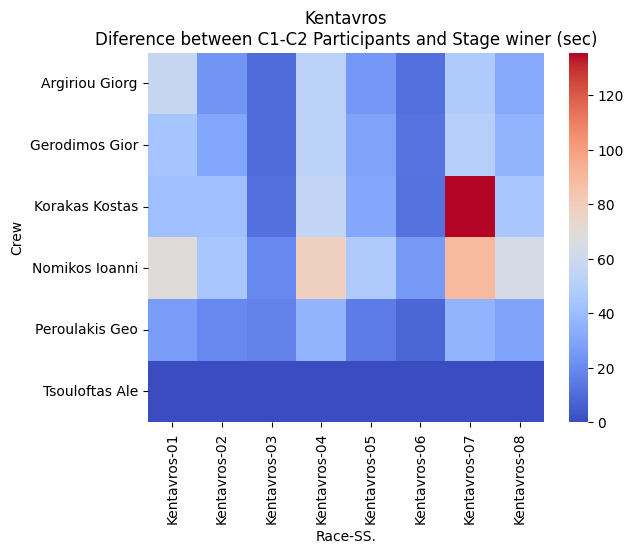

In [18]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C1-C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

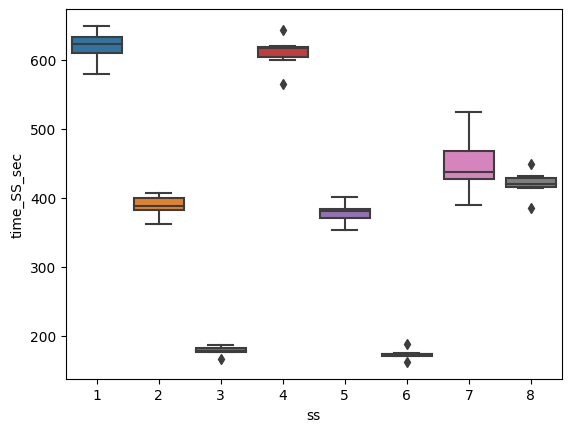

In [19]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

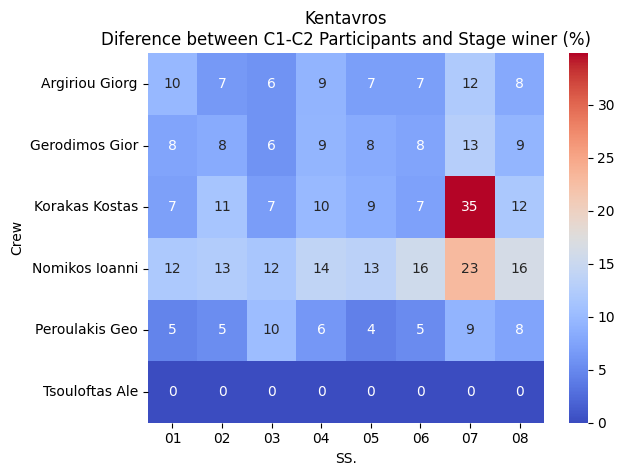

In [20]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1-C2 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")